In [11]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
Virtual memory usage - total: 126 GB / available: 111 GB / percent used: 11.3 %


# Load CRU

In [2]:
cru_path = '/bdd/cru/cru_ts_4.00/data/tmp'

In [154]:
lonlim=(50,100)
latlim=(20,45)

In [155]:
tmp_cru = xr.open_mfdataset(
    cru_path+'/'+'cru_ts4.00.*.tmp.dat.nc', 
    # http://xarray.pydata.org/en/stable/combining.html#combining-multi
    combine='nested', concat_dim='time',
#     combine='by_coords',
).sel(
#     time=slice('1951','2005'),
    lon=slice(lonlim[0],lonlim[1]),
    lat=slice(latlim[0],latlim[1])
).isel(
    time=slice(720,1380)
).tmp
tmp_cru

<xarray.DataArray 'tmp' (time: 660, lat: 50, lon: 100)>
dask.array<getitem, shape=(660, 50, 100), dtype=float32, chunksize=(660, 50, 100), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 50.25 50.75 51.25 51.75 ... 98.25 98.75 99.25 99.75
  * lat      (lat) float32 20.25 20.75 21.25 21.75 ... 43.25 43.75 44.25 44.75
  * time     (time) datetime64[ns] 1951-01-16 1951-02-15 ... 2005-12-16
Attributes:
    long_name:                   near-surface temperature
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0

In [156]:
tmp_cru_DJFMA = u.custom_season_clim(tmp_cru, season='DJFMA')
tmp_cru_DJFMA.load()

<xarray.DataArray (lat: 50, lon: 100)>
array([[ 22.45449005,  22.44792678,  22.98373644, ...,  20.610266  ,
         19.99386981,  21.32132503],
       [ 22.50133465,  22.54017344,  22.79336498, ...,  20.77790641,
         19.84385177,  19.79189838],
       [ 22.24464522,  22.28947031,  22.52481106, ...,  19.16462357,
         18.54777053,  16.40063738],
       ...,
       [         nan,          nan,   2.54756586, ...,  -5.8738912 ,
         -4.86539254,  -4.42418567],
       [  2.16475541,   1.77957689,   1.48454144, ...,  -7.50308945,
         -8.52939071,  -9.20604657],
       [  1.65816808,   1.28741436,   1.36081262, ..., -12.65624499,
        -10.20771744,  -9.95671375]])
Coordinates:
  * lon      (lon) float32 50.25 50.75 51.25 51.75 ... 98.25 98.75 99.25 99.75
  * lat      (lat) float32 20.25 20.75 21.25 21.75 ... 43.25 43.75 44.25 44.75
    season   <U5 'DJFMA'
Attributes:
    long_name:                   near-surface temperature
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0

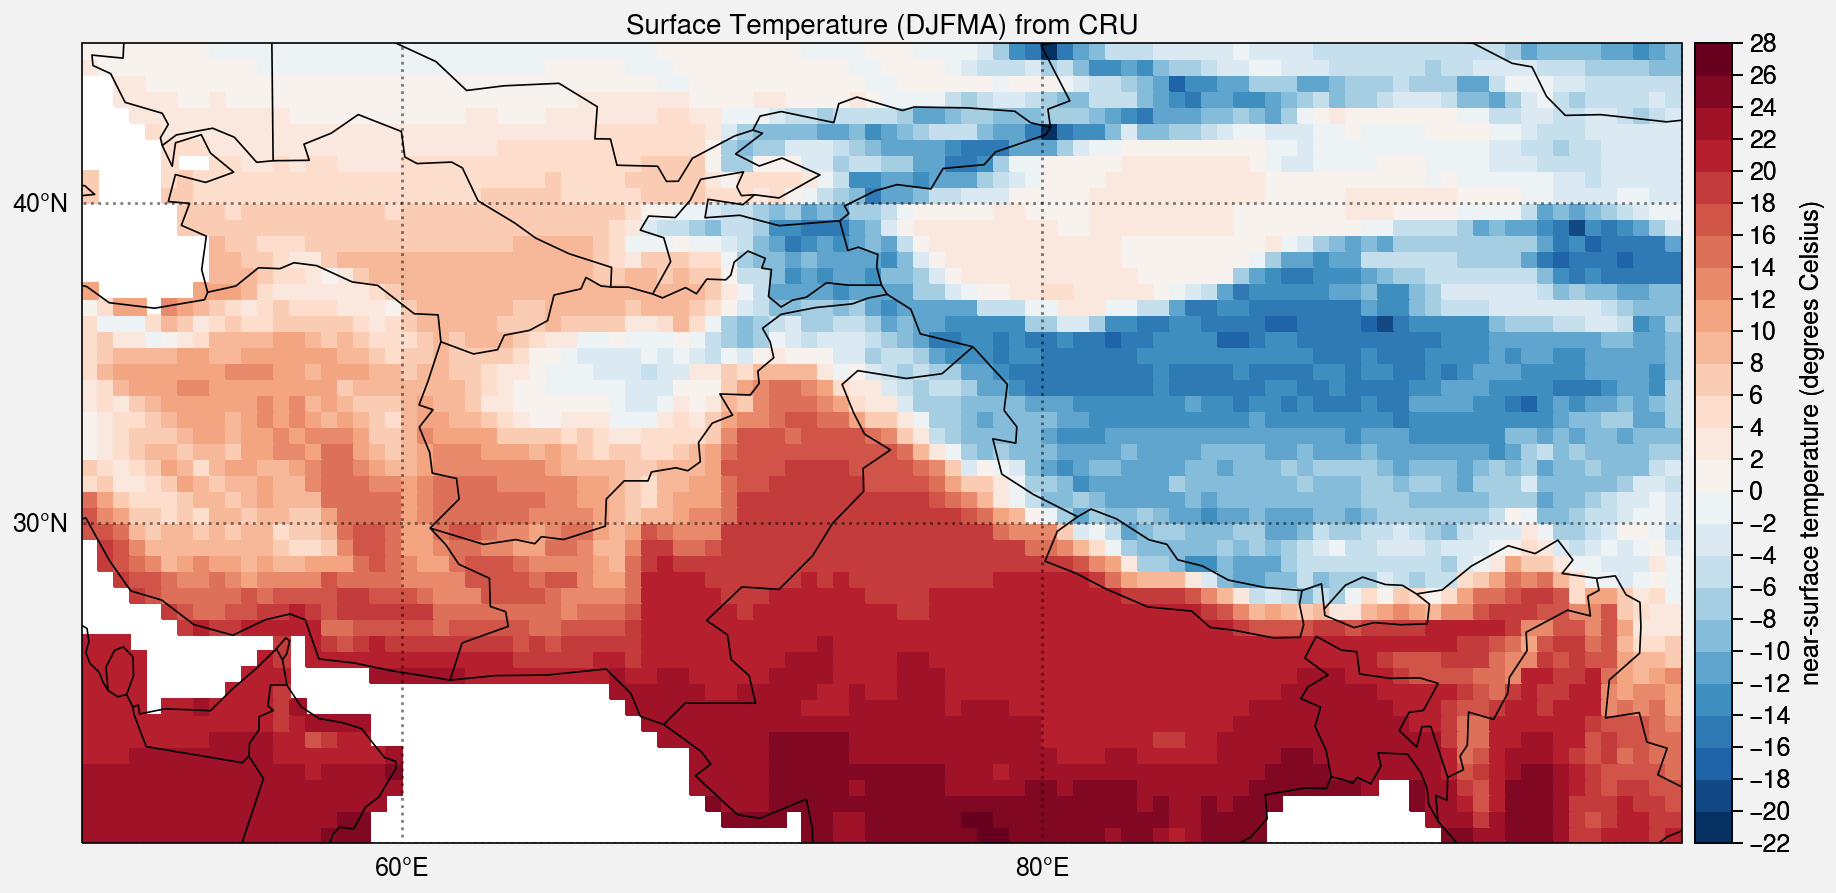

In [193]:
%matplotlib inline
f, axs = plot.subplots(ncols=1, nrows=1, proj='cyl', axwidth=8)

axs.pcolormesh(
    tmp_cru_DJFMA, 
    colorbar='r', 
#     cmap='Spectral', 
    cmap='RdBu_r', 
    norm='midpoint',
    levels=25,
)

axs.format(
    latlim=latlim, lonlim=lonlim,
    latlines=10, lonlines=20,
    labels=True, 
    borders=True,
    coast=True,
    title='Surface Temperature (DJFMA) from CRU'
)

# Load model

In [214]:
model_path = '/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/*/Amon/tas/gr/latest'

In [215]:
tas = xr.open_mfdataset(
    model_path+'/'+'*.nc',
    combine='nested', concat_dim='realization'
).sel(
    time=slice('1951','2005'),
    lon=slice(lonlim[0],lonlim[1]),
    lat=slice(latlim[0],latlim[1])
).tas
tas

<xarray.DataArray 'tas' (realization: 32, time: 660, lat: 20, lon: 21)>
dask.array<getitem, shape=(32, 660, 20, 21), dtype=float32, chunksize=(1, 660, 20, 21), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * time     (time) datetime64[ns] 1951-01-16T12:00:00 ... 2005-12-16T12:00:00
  * lon      (lon) float32 50.0 52.5 55.0 57.5 60.0 ... 92.5 95.0 97.5 100.0
  * lat      (lat) float32 20.28169 21.549295 22.816902 ... 43.09859 44.366196
Dimensions without coordinates: realization
Attributes:
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       air_temperature
    long_name:           Near-Surface Air Temperature
    history:             none
    units:               K
    cell_measures:       area: areacella

In [227]:
tas_DJMA = u.custom_season_clim(tas, season='DJFMA')
tas_DJMA.load()

<xarray.DataArray (realization: 32, lat: 20, lon: 21)>
array([[[291.48549045, 292.65993208, 292.88166263, ..., 294.75938464,
         290.73861551, 291.15284982],
        [291.24647406, 292.41503296, 292.63413181, ..., 293.49292903,
         289.46910028, 287.62275371],
        [290.76244307, 292.09720786, 292.4068547 , ..., 293.61416016,
         288.44041232, 285.76566618],
        ...,
        [280.81313389, 280.88722891, 277.07353253, ..., 265.97970149,
         264.62658538, 265.41028192],
        [279.33601562, 277.95329904, 275.43426779, ..., 263.75258625,
         263.92895098, 263.60825722],
        [278.10414503, 276.23596792, 274.40781102, ..., 262.85907923,
         259.97651193, 260.45759833]],

       [[291.19908391, 292.36535726, 292.57287597, ..., 294.85650623,
         290.8445286 , 291.26745773],
        [290.94510812, 292.10293652, 292.32426702, ..., 293.65558742,
         289.60555592, 287.69309111],
        [290.44621627, 291.7682661 , 292.06611037, ..., 293.76325717,
         288.58722332, 285.82877415],
        ...,
        [280.09122459, 279.98614017, 275.91541247, ..., 265.62093082,
         264.22614497, 265.03721819],
        [278.58134587, 276.95696227, 274.34152005, ..., 263.24551088,
         263.40939078, 263.04462695],
        [277.35370074, 275.27383452, 273.4404619 , ..., 262.28273282,
         259.53119426, 259.95087252]],

       [[291.65995907, 292.82158535, 293.03230931, ..., 294.88156515,
         290.80814475, 291.19086999],
        [291.39268217, 292.54322638, 292.7663951 , ..., 293.65882951,
         289.60447832, 287.68286012],
        [290.89203096, 292.20253235, 292.50988976, ..., 293.76575569,
         288.63630092, 285.8577905 ],
        ...,
        [280.68613007, 280.73716947, 276.99896788, ..., 266.2597844 ,
         264.81055417, 265.65829883],
        [279.14288092, 277.78809942, 275.39254637, ..., 263.94031543,
         264.05694185, 263.74568953],
        [277.88925711, 276.12189344, 274.4350171 , ..., 263.04617349,
         260.10578429, 260.41302855]],

       ...,

       [[291.35508015, 292.5607038 , 292.79723145, ..., 294.81042659,
         290.81971217, 291.27190854],
        [291.09326124, 292.29595842, 292.52938217, ..., 293.58215318,
         289.56444725, 287.7070161 ],
        [290.61760395, 291.96612481, 292.27526844, ..., 293.74148367,
         288.60367246, 285.8591824 ],
        ...,
        [280.38109191, 280.32537692, 276.51220165, ..., 265.86185558,
         264.47457492, 265.31250474],
        [278.87959676, 277.42741177, 274.93344741, ..., 263.4772976 ,
         263.67054739, 263.41447721],
        [277.659653  , 275.77429186, 274.01297266, ..., 262.71576009,
         259.81208528, 260.35269959]],

       [[291.27049191, 292.46604256, 292.68003987, ..., 294.79584999,
         290.775926  , 291.19636069],
        [291.02034951, 292.21621239, 292.42239703, ..., 293.55829527,
         289.54413318, 287.6259873 ],
        [290.56293749, 291.89072302, 292.18848202, ..., 293.64822689,
         288.53402861, 285.77416302],
        ...,
        [280.40534847, 280.37410526, 276.44643792, ..., 265.67801598,
         264.16563427, 265.03919602],
        [278.90178956, 277.40980385, 274.89143526, ..., 263.33462463,
         263.5707477 , 263.26303396],
        [277.66233925, 275.71790706, 273.9811158 , ..., 262.43524023,
         259.74762571, 260.10737681]],

       [[291.3729896 , 292.51855475, 292.69965662, ..., 294.91467992,
         290.93236548, 291.42670306],
        [291.11102331, 292.25741697, 292.45216908, ..., 293.6471909 ,
         289.62415691, 287.78019519],
        [290.64151057, 291.94414518, 292.21896976, ..., 293.73548396,
         288.61048105, 285.87880077],
        ...,
        [280.55825883, 280.60298971, 276.71075186, ..., 266.08305549,
         264.79508117, 265.43105097],
        [279.08169805, 277.65626026, 275.09821929, ..., 263.81022137,
         263.87713647, 263.42168714],
        [277.85785629, 275.97134527, 274.17550648, ..., 262.7019

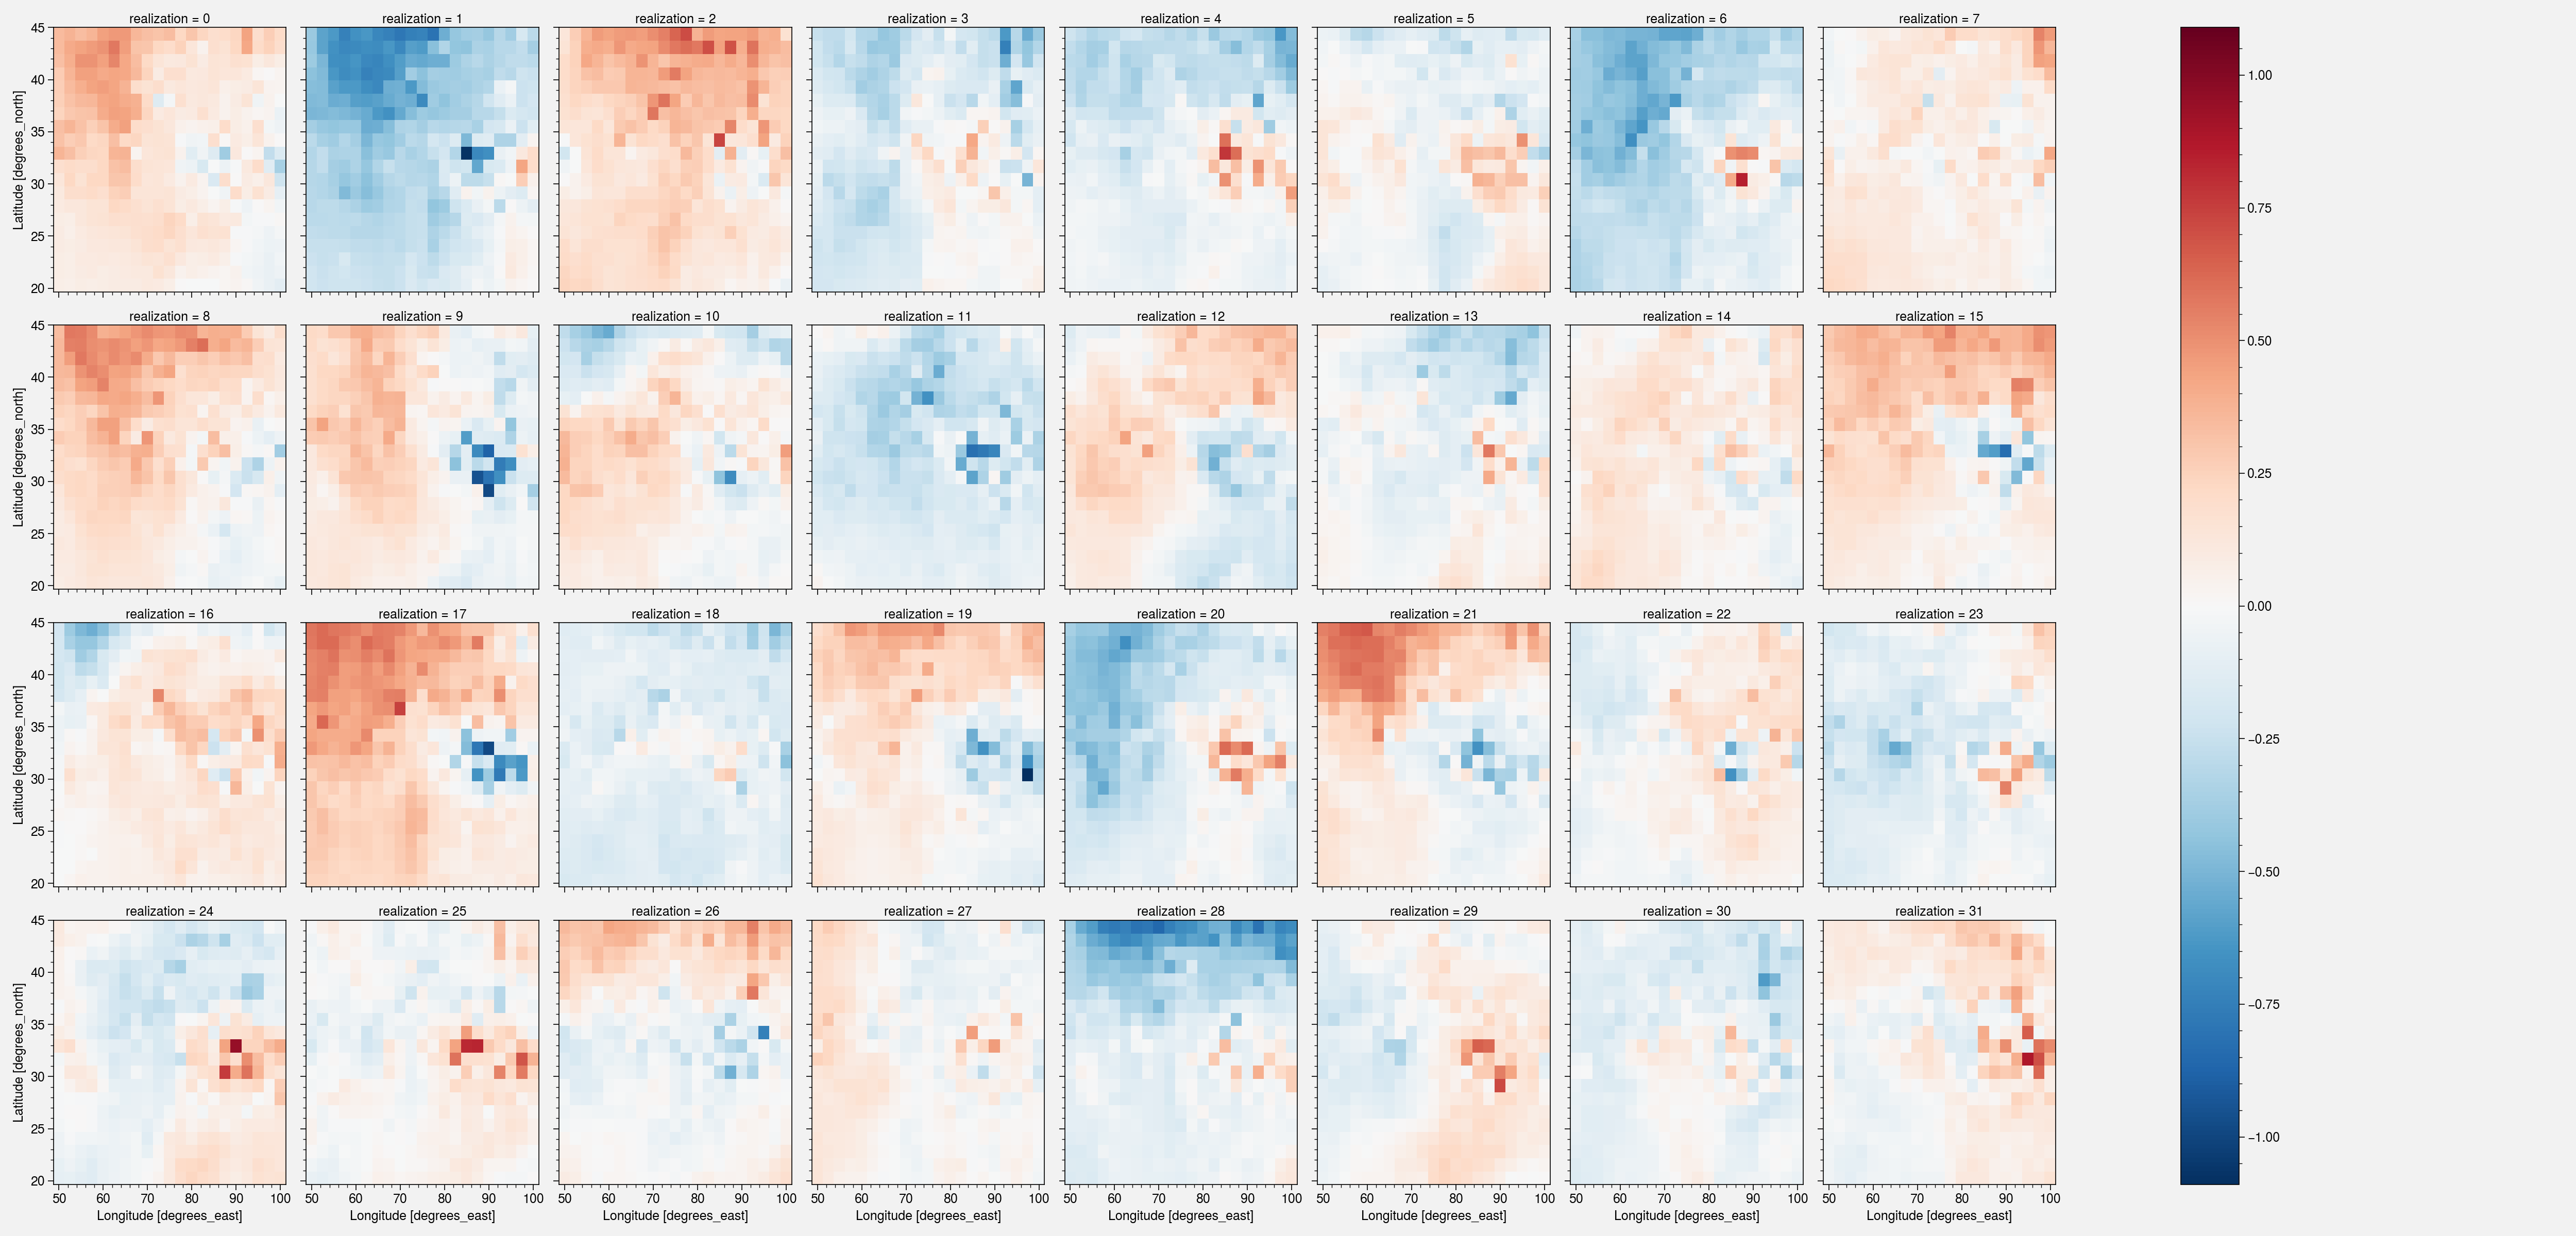

In [241]:
(tas_DJMA-tas_DJMA.mean('realization')).plot(col='realization', col_wrap=8)

In [244]:
regridder = xe.Regridder(tmp_cru, tas, 'bilinear')
regridder

Create weight file: bilinear_50x100_20x21.nc


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_50x100_20x21.nc 
Reuse pre-computed weights? False 
Input grid shape:           (50, 100) 
Output grid shape:          (20, 21) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

In [246]:
tmp_cru_DJFMA_regrid = regridder(tmp_cru_DJFMA)

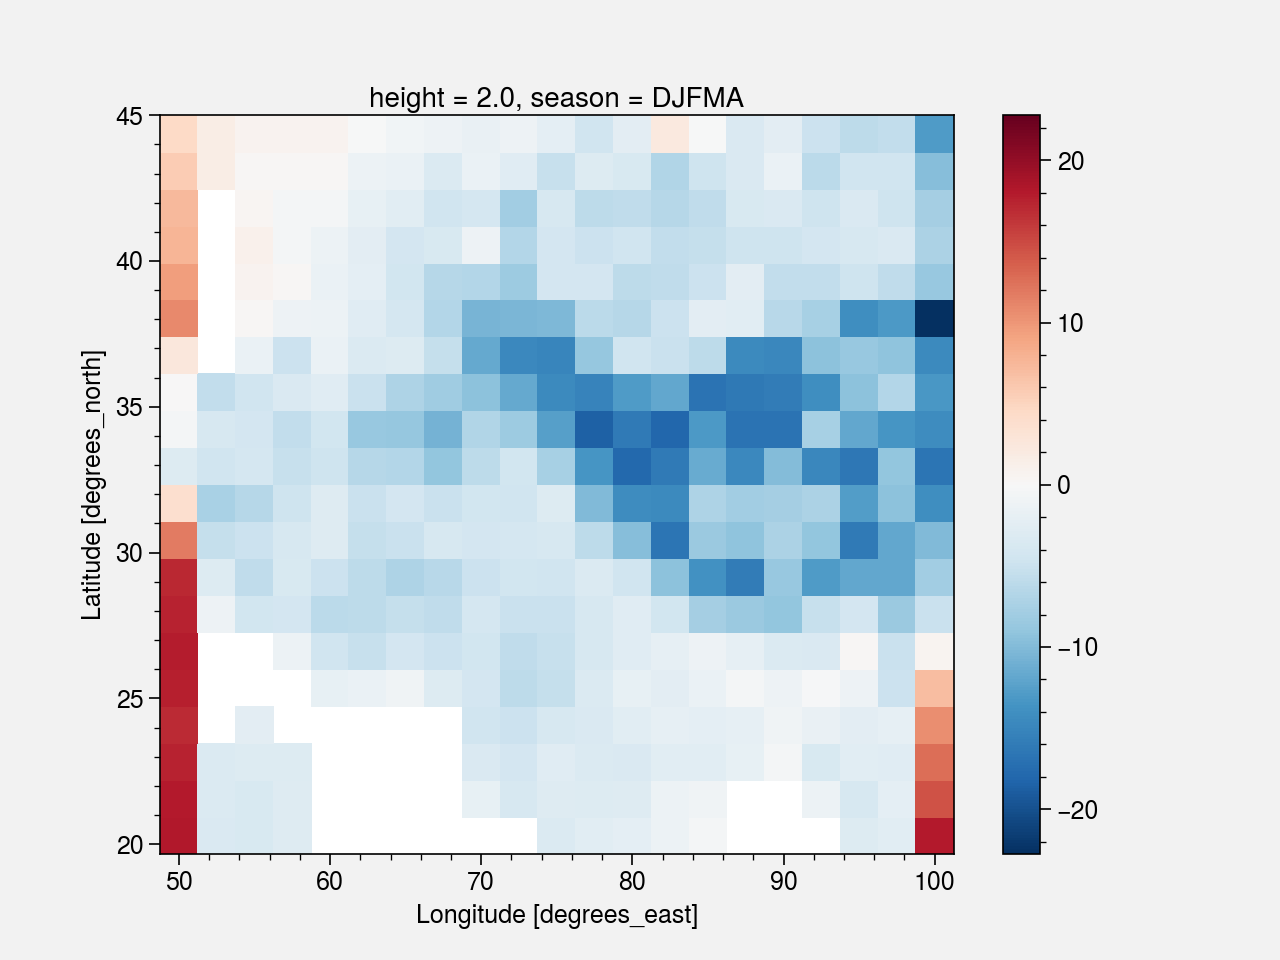

In [250]:
((tas_DJMA.mean('realization')-273.15) - tmp_cru_DJFMA_regrid).plot()

In [242]:
tas_DJMA.mean('realization')

<xarray.DataArray (lat: 20, lon: 21)>
array([[291.41584234, 292.59939984, 292.8021074 , 294.14322832,
        294.44926081, 294.56070257, 295.01231344, 295.34087304,
        296.15824888, 296.42676389, 294.58686798, 296.22050196,
        296.58441522, 295.72822915, 296.89693663, 298.09351052,
        297.81981989, 297.86519547, 294.80876606, 290.82238992,
        291.26710494],
       [291.16165584, 292.34274089, 292.54749902, 293.09055858,
        294.59525444, 294.31995333, 294.74470951, 294.82546953,
        295.05555561, 294.39781326, 294.86165739, 294.19508297,
        294.74787317, 296.00778004, 295.31426943, 297.69326473,
        297.80127686, 294.46496065, 293.5505796 , 289.55167422,
        287.6768469 ],
       [290.68209309, 292.0225077 , 292.30502588, 290.39921802,
        294.14960609, 294.22703965, 294.4918187 , 294.12766928,
        293.38361523, 293.57566547, 293.3692381 , 293.05480803,
        292.40642291, 292.53291942, 292.32642769, 295.3058455 ,
        296.03718681, 291.45296617, 293.66192724, 288.5207104 ,
        285.8071882 ],
       [290.07910656, 293.0266237 , 292.39204968, 294.01188617,
        294.15293398, 293.99293409, 294.2065145 , 293.67005512,
        291.38802264, 291.05977814, 291.75709486, 291.86689414,
        292.08756484, 292.28936175, 292.07378734, 293.97872104,
        294.87588804, 291.50081812, 291.6208111 , 288.41573158,
        283.82927752],
       [290.84269216, 291.90800271, 293.30919667, 294.17620933,
        293.39804003, 293.14412554, 292.83775812, 291.1927312 ,
        290.37620425, 289.76263851, 289.37242197, 291.08228812,
        292.5496397 , 292.6018204 , 293.39489089, 293.77819712,
        293.11766548, 289.85535783, 287.94680744, 286.1854165 ,
        280.2030928 ],
       [291.06111059, 292.38039541, 292.49763838, 290.12475086,
        286.22586145, 285.60626094, 285.54449116, 287.73150083,
        289.4662493 , 288.65866255, 288.62737171, 290.13715103,
        291.25120205, 292.56926677, 293.05588729, 289.47978647,
        288.62598876, 290.38472667, 288.15189868, 283.11717173,
        273.75823194],
       [290.66325398, 288.34106725, 283.65566066, 285.68757421,
        283.02748044, 282.86793479, 282.93299754, 285.27239276,
        289.234083  , 288.35181713, 287.82129862, 289.49988381,
        290.86053891, 286.93600253, 276.96298869, 259.68318348,
        263.29671773, 268.89383031, 286.06836288, 272.67515724,
        268.1307982 ],
       [290.34026673, 279.66723292, 276.48578417, 277.00227015,
        281.71892098, 282.22254657, 280.0594578 , 283.09510215,
        286.70835764, 287.96921515, 288.15883736, 288.87633439,
        284.91657415, 261.74554668, 249.56971279, 249.45695873,
        260.01297687, 255.10289222, 265.48859951, 258.83543282,
        265.23276726],
       [284.97925436, 273.35532841, 275.98923353, 279.25677915,
        282.92199695, 283.01838091, 280.92579061, 276.4766727 ,
        282.99275987, 287.95662492, 288.34775798, 283.4492115 ,
        260.43174191, 247.03205671, 253.33810421, 253.59892881,
        257.08561428, 256.48236317, 254.33870016, 256.11012821,
        263.04674384],
       [277.06312082, 274.17469571, 277.44846657, 281.73696404,
        279.83025331, 281.54939923, 279.38093876, 274.83694458,
        281.91875781, 286.68000032, 287.02524373, 266.06179286,
        249.28767831, 248.47308141, 256.77830144, 256.69208717,
        257.66281246, 257.02545633, 252.36898716, 255.2506626 ,
        258.94488877],
       [270.01399971, 275.64356953, 279.40112137, 279.71161539,
        275.9228681 , 276.21016353, 271.12350659, 266.56941496,
        277.04390388, 285.00109565, 276.79055629, 251.71429878,
        245.52278832, 245.73132656, 250.26202813, 246.93247922,
        250.97028609, 245.32927855, 245.72689948, 255.1870861 ,
        256.47425642],
       [272.64735471, 280.18967991, 280.07387278, 278.0445105 ,
        278.08540707, 270.44161271, 264.16954644, 259.80359719,
        271.01695176, 278.55111095, 260.83210062, 247.6519884